#COGS 108 - Final Project: Spotify Song Popularity Predictor

>

#Team Members:

>
Peter Tran: A12995929 Email: ptt006@ucsd.edu
> 
Timothy Lue: A13559509 Email: thlue@ucsd.edu
> 
Elizabeth Farkas: A12672024 Email: efarkas@ucsd.edu
>

Mikaela McNally A12971359 Email: mmmcnall@ucsd.edu

#Contributions:
>
Peter Tran: Data Analysis and Results
> 
Timothy Lue: Data Description, Privacy/Ethics Considerations, Conclusions and Discussion
> 
Elizabeth Farkas: Data Cleaning/ Pre-processing, Data Visualization
>
Mikaela McNally: Introduction and Background, Privacy/Ethics
>
All of us contributed equally to writing and editing the proposal, the descriptions for the different sections of this project, and the conclusion of this project :)




#Introduction and Background

>
In this project, our goal was to analyze what features make a Spotify song popular and see if it is possible to predict the popularity of a song based on its features. There are many theories as to what makes a song “popular” - for the context of this project we mean it makes the Spotify Top 100 list for that year. Some theories of factors that contribute to song popularity include familiarity/repetition, catchiness, relatability, invoking emotion, the right artist, the right producer, and good marketing.  Based on these theories, we tried to determine how we might be able to quantify the quality and features of a song.  Then, we could analyze what features characterize known popular songs to see if we can find any correlations to predict the popularity of any song.  
>
As a means of generally quantifying a songs’ audio features, we decided to use  __[Spotify Audio Features](https://developer.spotify.com/documentation/web-api/reference/tracks/get-several-audio-features/)__ as defined by the official Spotify Web API. These audio features include: danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, tempo, time signature, valence, duration (see definition table below). As a means of quantifying an artist’s popularity, we created our own artist popularity index based on the number of songs that artist had in the Top 100 Spotify songs of the previous year. 
 >
We hypothesize that song popularity is correlated to two factors, the song’s specific combinations of audio features, and the popularity of the artist of the song. We predict that song popularity will be positively correlated to certain audio features including: danceability, energy, and valence. Further, we predict that song popularity will be negatively correlated with the audio features of  liveness and instrumentalness. We also believe that song popularity will be correlated to artist popularity; the more popular the song artist is, the more popular the song will be. We believe that we will be able to analyze relationships between audio features, artist popularity, and a songs’ popularity to create a model (linear and logistic) that can take in the features of a song, and predict the song’s popularity. 

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import math
import seaborn as sb
from IPython.display import display

#Data Description
>
In this project, we use 3 Kaggle datasets: __[Spotify Audio Features](https://www.kaggle.com/tomigelo/spotify-audio-features)__ , __[Top Spotify Tracks of 2017](https://www.kaggle.com/nadintamer/top-tracks-of-2017)__ , and __[Top Spotify Tracks of 2018](https://www.kaggle.com/nadintamer/top-spotify-tracks-of-2018)__  The Spotify Audio Features dataset contains 116,191 observations of songs taken from the Spotify Web API as of December 2018. The Top Spotify Tracks of 2017 and 2018 datasets each contain 100 observations of songs taken from Top Spotify Tracks playlist of both respective years found on the Spotify Web API. All three datasets contain the following fields and audio features: track id, song name, artist name, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, tempo, time signature, valence, duration. The Spotify Audio Features dataset also contains a data value for song popularity. The list of audio features and their description can be found in the table below. 
>
In addition to the three Spotify datasets, we created our own artist popularity feature which approximates artist popularity. We created the artist popularity feature by counting the frequency that an artist appears in the previous years’ Top 100 Spotify Tracks, dividing each element in that list by the value of the maximum frequency so that every artist that was popular in the previous year receives a popularity value between 0 and 1.  Every other artist receives a popularity value of 0. For this project, we used the Top 100 2017 tracks to predict the Top 100 2018 tracks. Once we computed each artist’s popularity index, we appended that value to all the artists’ songs in the Spotify AUdio Features dataset so that we could use the artist popularity index as another metric to analyze and predict a songs’ popularity. 
>



In [0]:
url = 'https://raw.githubusercontent.com/ptt006/COGSFinal/master/AudioFeaturesDescription.csv?token=AZDL58ahDr1uRHFelZaD4PXxtDpEsl59ks5cnV90wA%3D%3D'
audio_feature_desc = pd.read_csv(url)
pd.set_option('display.max_colwidth', 0)

audio_feature_desc

,Audio Feature,Description
0,acousticness,A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
1,danceability,"Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable."
2,duration_ms,The duration of the track in milliseconds.
3,energy,"Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy."
4,instrumentalness,"Predicts whether a track contains no vocals. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0."
5,key,"The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C#/Db, 2 = D, and so on. If no key was detected, the value is -1."
6,liveness,Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
7,loudness,The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.
8,mode,"Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0."
9,speechiness,"Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks."


In [0]:
# Import Datasets 
#Import Spotify Audio Features Dataset 
url = 'https://raw.githubusercontent.com/ptt006/COGSFinal/master/SpotifyAudioFeaturesNov2018.csv?token=AZDL52-H1NoWuRgVDmXu5aK5NjZLbBHNks5cnVgPwA%3D%3D'
audio_features = pd.read_csv(url)

# Import Top 2017 Spotify Songs Dataset
url = 'https://raw.githubusercontent.com/ptt006/COGSFinal/master/top2017.csv?token=AZDL5_Ol_r2V3PmgYm4kwXpr68rAPrNtks5cnVoZwA%3D%3D'
top2017 = pd.read_csv(url)

# Import Top 2018 Spotify Songs Dataset
url = 'https://raw.githubusercontent.com/ptt006/COGSFinal/master/top2018.csv?token=AZDL52KwLLSKG08rs1CKZ47huCCLgVaKks5cnVnZwA%3D%3D'
top2018 = pd.read_csv(url)

In [0]:
# Visualize Raw Datasets
print("Audio Features Dataset")
display(audio_features.head(3))

print("Top 2017 Dataset")
display(top2017.head(3))

print("Top 2018 Dataset")
display(top2018.head(3))


Audio Features Dataset


,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.00582,0.743,238373,0.339,0.0,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,44
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.02440,0.846,214800,0.557,0.0,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,10
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.02500,0.603,138913,0.723,0.0,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,63


Top 2017 Dataset


,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.581,0.0,0.0931,0.931,95.977,233713.0,4.0
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.229,0.0,0.0924,0.813,88.931,228827.0,4.0
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.209,0.0,0.1120,0.846,177.833,228200.0,4.0


Top 2018 Dataset


,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,6DCZcSspjsKoFjzjrWoCd,God's Plan,Drake,0.754,0.449,7.0,-9.211,1.0,0.1090,0.0332,0.000083,0.552,0.357,77.169,198973.0,4.0
1,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,0.740,0.613,8.0,-4.880,1.0,0.1450,0.2580,0.003720,0.123,0.473,75.023,166606.0,4.0
2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5.0,-6.090,0.0,0.0898,0.1170,0.000066,0.131,0.140,159.847,218147.0,4.0


#Data Cleaning/ Pre-processing
>
The three Kaggle datasets we begin with are fairly clean and preprocessed (no NaN’s), and since our features are not string-based, we do not have to do any word embedding.  We did further processing on our datasets, however, by dropping features/columns we deemed irrelevant to our analysis and analyzing a smaller subset of the Audio Features Dataset. Dropped columns include: track_id, time_signature, loudness, and acousticness. Track_id is an arbitrarily determined track number given by spotify which we dropped because it did not contain any information pertaining to the audio qualities of a song. Time_signature was dropped because > 90% of the data had the same time signature so this audio feature was not useful enough for analysis. Finally, loudness was dropped, as well as acousticness, due to the strong positive and strong negative correlations (respectively) that they had on energy in order to avoid overfitting in the model we created later.
>
We reduced the size of the Audio Features Dataset from ~100k to ~10k dataset so that it does not take a really long time to train the model we create later. Since 10k is still a very large dataset size and we use a random number generator to randomly remove items from the dataset, this subset of data is still an accurate and valid dataset to use to train our model.

>
Additionally, as described in the Data Description section, we created an artist popularity feature (a value between 0 and 1) which we appended to the Audio Feature Dataset so that we could use the artist popularity index as another metric to analyze and predict a songs’ popularity.  The following are the steps we followed in the Data Cleaning process.
>
Step 1) Reduce size of Audio Features Dataset from 100k to 10k
>
Step 2) Remove the "track id" column from all 3 datasets.  
>
Step 3) Visualize the distribution of each audio feature. Remove features with no meaningful contribution.
>
Step 4) Determine if there are any features that are highly correlated. Drop over correlated attributes to avoid overfitting.
>
Step 5) Create artist popularity feature and add it to the Audio Feature dataset.  
>




In [0]:
# Step 1) Reduce size of Audio Features Dataset from ~100k to ~10k to reduce processing time of model.
#Use random number generator to randomly select indices to drop from the original dataset

np.random.seed(10)
remove_n = (int)(len(audio_features)/1.1)
drop_indices = np.random.choice(audio_features.index, remove_n, replace=False)
af_subset = audio_features.drop(drop_indices)

print("The size of the Audio Features Subset is now " + str(af_subset.shape[0]) + " instead of " + str(audio_features.shape[0]))


The size of the Audio Features Subset is now 10580 instead of 116372


In [0]:
# Step 2) Remove track id from all 3 datasets 
af_subset.drop(columns=['track_id'], inplace=True)
top2017.drop(columns=['id'], inplace=True)
top2018.drop(columns=['id'], inplace=True)

if (not 'track_id' in af_subset.columns and not 'id' in top2017.columns and not 'id' in top2018.columns):
  print("track id has been successfully removed from all datasets")

track id has been successfully removed from all datasets


Histogram for each audio feature in the Audio Feature Dataset subset


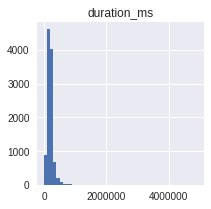

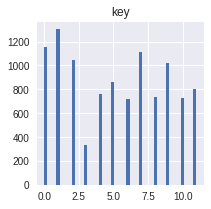

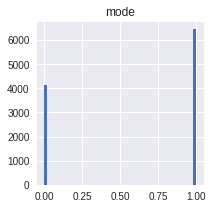

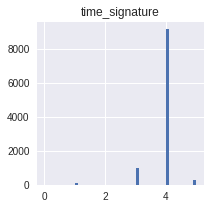

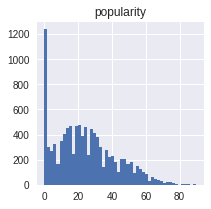

In [0]:
# Step 3) Visualize the distribution of each audio feature to find any columns we should remove
for col in af_subset.columns:
  if(str(af_subset[col].iloc[0]).isnumeric()):
    hist = af_subset.hist(column = str(col), bins = 50, figsize=(3,3))
    
print("Histogram for each audio feature in the Audio Feature Dataset subset")

In [0]:
# Remove time signature from all 3 datasets 
af_subset.drop(columns=['time_signature'], inplace=True)
top2017.drop(columns=['time_signature'], inplace=True)
top2018.drop(columns=['time_signature'], inplace=True)

if (not 'time_signature' in af_subset.columns and not 'time_signature' in top2017.columns and not 'time_signature' in top2018.columns):
  print("time signature has been successfully removed from all datasets")

time signature has been successfully removed from all datasets


In [0]:
# Step 4)  Determine if there are any features that are highly correlated. Drop over correlated attributes to stop overfitting.

af_subset.corr()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,popularity
acousticness,1.000000,-0.366054,0.035918,-0.698730,0.271540,-0.033978,-0.098503,-0.605239,0.062628,-0.105172,-0.221077,-0.190977,-0.096314
danceability,-0.366054,1.000000,-0.120232,0.281096,-0.292239,0.021539,-0.129032,0.426870,-0.051640,0.241450,0.085112,0.462093,0.138930
duration_ms,0.035918,-0.120232,1.000000,-0.039915,0.046416,0.014100,-0.001412,-0.039171,0.004956,-0.096820,-0.016607,-0.135515,-0.014328
energy,-0.698730,0.281096,-0.039915,1.000000,-0.299966,0.044333,0.204579,0.767681,-0.063557,0.113236,0.232979,0.319903,0.107761
instrumentalness,0.271540,-0.292239,0.046416,-0.299966,1.000000,-0.050247,-0.062574,-0.514285,-0.002016,-0.215237,-0.094684,-0.245829,-0.224484
key,-0.033978,0.021539,0.014100,0.044333,-0.050247,1.000000,0.015414,0.036878,-0.193443,-0.015256,0.005298,0.034950,0.018201
liveness,-0.098503,-0.129032,-0.001412,0.204579,-0.062574,0.015414,1.000000,0.072935,-0.008407,0.118924,-0.023367,-0.000508,-0.039376
loudness,-0.605239,0.426870,-0.039171,0.767681,-0.514285,0.036878,0.072935,1.000000,-0.032194,0.085312,0.237500,0.324668,0.233290
mode,0.062628,-0.051640,0.004956,-0.063557,-0.002016,-0.193443,-0.008407,-0.032194,1.000000,-0.044915,-0.001732,0.017128,-0.020612
speechiness,-0.105172,0.241450,-0.096820,0.113236,-0.215237,-0.015256,0.118924,0.085312,-0.044915,1.000000,0.052575,0.114556,-0.005317


In [0]:
# By looking at this pairwise correlation, we notice that loudness has a strong positive correlation to energy (77%) and acousticness has a strong negative correlations to energy(-70%).
#We drop these columns from all datasets to avoid overfitting

# Remove loudness from all 3 datasets 
af_subset.drop(columns=['loudness'], inplace=True)
top2017.drop(columns=['loudness'], inplace=True)
top2018.drop(columns=['loudness'], inplace=True)

if (not 'loudness' in af_subset.columns and not 'loudness' in top2017.columns and not 'loudness' in top2018.columns):
  print("loudness has been successfully removed from all datasets")
  
# Remove acousticness from all 3 datasets 
af_subset.drop(columns=['acousticness'], inplace=True)
top2017.drop(columns=['acousticness'], inplace=True)
top2018.drop(columns=['acousticness'], inplace=True)

if (not 'acousticness' in af_subset.columns and not 'acousticness' in top2017.columns and not 'acousticness' in top2018.columns):
  print("acousticness has been successfully removed from all datasets")

loudness has been successfully removed from all datasets
acousticness has been successfully removed from all datasets


In [0]:
# Step 5) Create artist popularity feature and add it to the audio feature dataset

# Drop duplicate tracks
top2017.drop_duplicates(subset=['artists','name'], inplace=True)

# create list of the number of 2017 hits an artist has in descending order 
df_artistpop = top2017[['artists','name']].groupby('artists').count().sort_values('name', ascending=False)
df_artistpop.rename(columns={'name': '2017 hits'}, inplace=True)

# normalize artist popularity by most popular artist
normalized_df=(df_artistpop/df_artistpop.max())
print("Popularity Indexes of Top 5 2017 Artists")
display(normalized_df.head(5))

# convert dataset to dictionary
dict_artistpop = normalized_df.to_dict()['2017 hits']

# create a list of artist popularity with indices corresponding to audio features artsits
list = []
for artist in af_subset['artist_name']: 
    if artist in dict_artistpop:
        list.append(dict_artistpop[artist])
    
    else: 
        list.append(0)
        
#append the artist populartity feature to the audio features dataset
af_subset['artist_pop'] = list


Popularity Indexes of Top 5 2017 Artists


,2017 hits
artists,
Ed Sheeran,1.00
The Chainsmokers,1.00
Drake,0.75
Martin Garrix,0.75
Maroon 5,0.50


In [0]:
print("Audio Features Dataset with Artist Popularity Index Appended")
display(af_subset.head(20))

# We can now use the refined Audio Features Dataset subset to train and analyze our model

Audio Features Dataset with Artist Popularity Index Appended


,artist_name,track_name,danceability,duration_ms,energy,instrumentalness,key,liveness,mode,speechiness,tempo,valence,popularity,artist_pop
2,R3HAB,Radio Silence,0.603,138913,0.723,0.000000,9,0.0824,0,0.0454,114.966,0.3820,63,0.0
19,Pablo XD,Particular - Original mix,0.812,124016,0.504,0.944000,1,0.0848,1,0.0550,120.014,0.5850,7,0.0
50,Snow Patrol,Heal Me,0.552,241160,0.789,0.000005,9,0.0874,1,0.0242,93.938,0.3490,53,0.0
86,Xavier Wulf,Wake Walker,0.832,133349,0.457,0.000029,1,0.1330,1,0.1720,130.026,0.2270,37,0.0
88,Armin van Buuren,"A State Of Trance (ASOT 874) - Coming Up, Pt. 2",0.453,41565,0.507,0.000000,7,0.8360,1,0.3030,111.266,0.5360,18,0.0
106,Armin van Buuren,"A State Of Trance (ASOT 874) - Track Recap, Pt. 4",0.427,33240,0.659,0.000000,7,0.3480,1,0.2020,134.254,0.6980,15,0.0
108,Armin van Buuren,"A State Of Trance (ASOT 874) - Coming Up, Pt. 5",0.486,34920,0.805,0.000000,8,0.2560,1,0.2490,131.339,0.3910,15,0.0
135,ALPHA 9,Sleepwalker (ASOT 874),0.210,189100,0.506,0.038000,4,0.2070,0,0.0512,122.931,0.1340,16,0.0
184,Ethan Payton,On The Move,0.841,207652,0.402,0.000003,9,0.0984,1,0.0760,115.024,0.5420,30,0.0
203,"Christone ""Kingfish"" Ingram",The Thrill Is Gone,0.660,256508,0.415,0.000518,4,0.1690,1,0.1510,90.384,0.5370,45,0.0


#Data Visualization
>
We already utilized some data visualizations to help us remove song features from our dataset that did not make any significant contribution to our analysis.  As an intermediate step, we thought it could be useful and interesting to see how popularity correlates to each individual feature of the songs within our Audio Feature Dataset subset. From this visualization alone, we might be able to predict which features will have the greatest influence in our model.  Here is an overview of some observations we made from this visualization
>
Audio features that seem to have no significant correlation to popularity (e.g. the datapoints are evenly distributed) include:  key, liveness, mode, instrumentalness, and valence. This suggestes that the key, whether a recording is live or not, whether it is major or minor, whether it is mostly instrumental, whether it is happy or sad does not affect the popularity of a song.
>
Audio features with some positive correlation to song popularity include: danceability, energy, and artist popularity. This suggests that songs that have dancing rhythms and with high energy, and that songs with famous artists are more likely to be popular.
>
Audio features with some negative correlation to song popularity include: duration, and speechiness. This suggests that long songs and songs with many vocals are likely to be less popular.
>
Lastly, an interesting normally distributed correlation occurs with tempo around 120 BPM suggesting people don’t like songs that are too fast or too slow. 
>

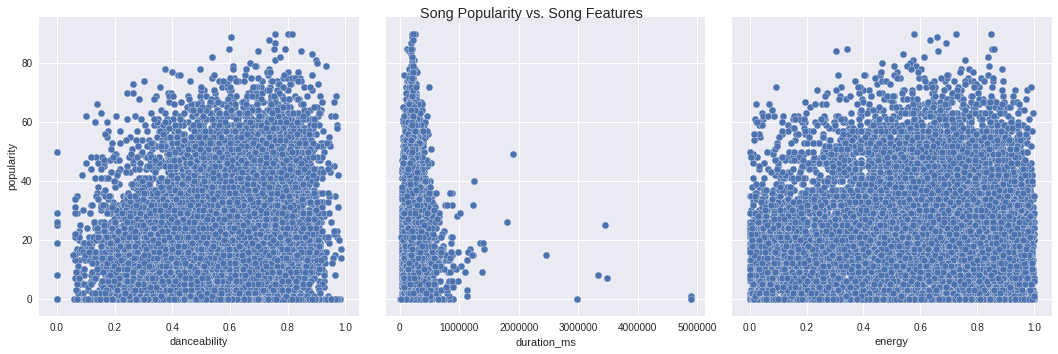

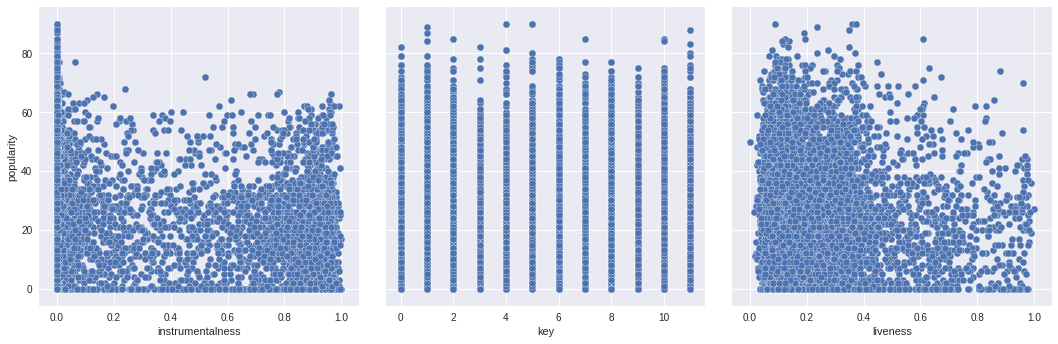

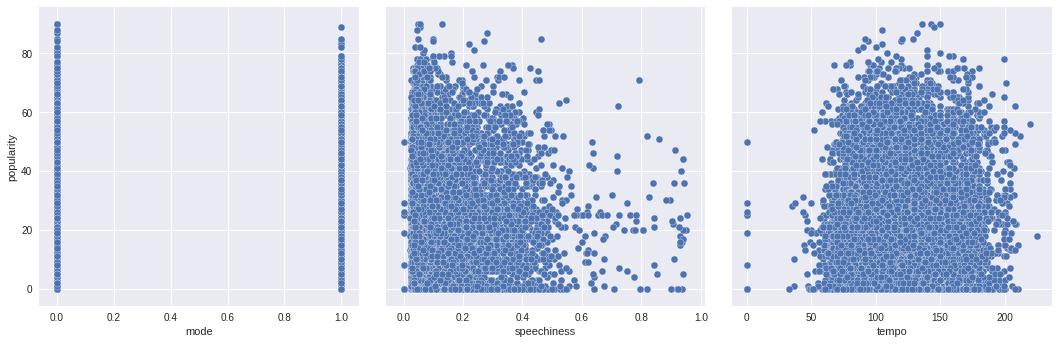

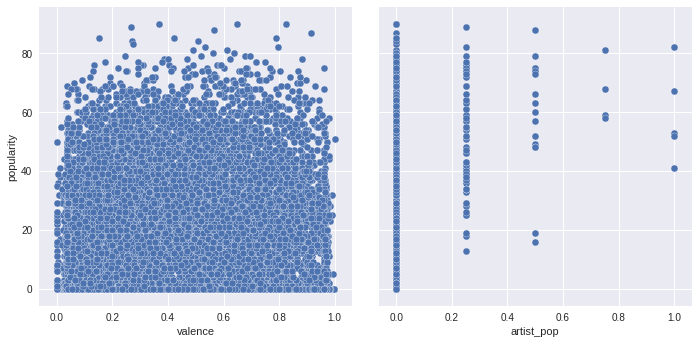

In [0]:
# Plots of every audio feature and artist popularity agaisnt the popularity of a songs
pp = sb.pairplot(data=af_subset,
                  y_vars=['popularity'],
                  x_vars=['danceability', 'duration_ms', 'energy'], size=5)
pp.fig.suptitle("Song Popularity vs. Song Features")
pp = sb.pairplot(data=af_subset,
                  y_vars=['popularity'],
                  x_vars=['instrumentalness', 'key', 'liveness'], size=5)
pp = sb.pairplot(data=af_subset,
                  y_vars=['popularity'],
                  x_vars=[ 'mode', 'speechiness', 'tempo'], size=5)
pp = sb.pairplot(data=af_subset,
                  y_vars=['popularity'],
                  x_vars=['valence', 'artist_pop'], size=5)

#Data Analysis and Results#

In our analysis we will be using a linear regression model followed by  a logistic regression model. The reasoning behind these two simple models is that we want to be able to interpret the weights behind the features. Afterall, our goal isn't to create a program that predicts songs accurately. If this were the case, we would have used a Neural Network. Instead, our goal is to answer which features contribute most to a song's popularity. Logistic regression is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary). If we divide the popularity vairable by 100 we end up with a value between 0 and 1. Therefore, the logit model seems like a good fit for this situation. The linear regression is just used a base model to compare our logit model to. 

In [0]:
features = af_subset.columns.drop(['popularity','artist_name','track_name'])

#splitting the data into a training set and test set. 
X_train, X_test, y_train, y_test = train_test_split(af_subset[features], af_subset['popularity'])

## Using a Linear Regression Model ##

In [0]:
#training the model
lin_reg = LinearRegression().fit(X_train,y_train)

In [0]:
#using the fitted model to predict
lin_prediction = lin_reg.predict(X_test)
print("These are our predicitons:", lin_prediction)

print("The score of the Linear Regression Model is :", lin_reg.score(X_train, y_train))

These are our predicitons: [25.26665857 26.56535775 26.31826093 ... 27.73697878 29.61255031
 27.29566163]
The score of the Linear Regression Model is : 0.08414562445785467


The linear regression model produces an $R^2$ value of $0.08879$. This is a very low number and it means that much of the variance in our data cannot be explained in our model. We have to use a different model because this one is not too useful. ie a good representation of the data

##Using a Logit Model ##

In [0]:
import statsmodels.api as sm
logit_model= sm.Logit(y_train/100,X_train)
result=logit_model.fit()
print(result.summary2())

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Optimization terminated successfully.
         Current function value: 0.458846
         Iterations 6
                         Results: Logit
Model:              Logit            No. Iterations:   6.0000   
Dependent Variable: popularity       Pseudo R-squared: 0.008    
Date:               2019-03-22 06:47 AIC:              7303.8875
No. Observations:   7935             BIC:              7380.6569
Df Model:           10               Log-Likelihood:   -3640.9  
Df Residuals:       7924             LL-Null:          -3668.6  
Converged:          1.0000           Scale:            1.0000   
----------------------------------------------------------------
                  Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------
danceability     -0.0986   0.1503 -0.6557 0.5120 -0.3933  0.1961
duration_ms      -0.0000   0.0000 -2.8347 0.0046 -0.0000 -0.0000
energy            0.1038   0.1183  0.8768 0.3806 -0.1282  0.3357
instrumentaln

Looking at the table product by the logistic regression, we are given a list of coefficients representing how the respective audio feature affects song popularity. The interpretation of the coefficient is this: "If I increase(decrease) this audio feature by 1 percent, then my song popularity will increase(decrease) by Coefficient percent".
>
For P values that are close to zero, (less than 0.05), we can use the interpretation provided above with a confidence level of 95%
>
However, for most of these coefficients, the p-value is not close to zero.  This means that we cannot reject the null hypothesis which is that the feature has no effect on song popularity. In other words, we cannot claim that this feature has anything to do with the popularity of the song. 
>
The feature that stands out most in this table is artist popularity. Not only is it significant, the coefficient is quite large. This can indicate that song popularity has little to do with the features of a song and popularity has more to do with how the song is marketed, or the platform size of the artist.

### Predicting the popualrity of the top hits of 2018 ###

In [0]:
top2018.head(3)

,name,artists,danceability,energy,key,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms
0,God's Plan,Drake,0.754,0.449,7.0,1.0,0.1090,0.000083,0.552,0.357,77.169,198973.0
1,SAD!,XXXTENTACION,0.740,0.613,8.0,1.0,0.1450,0.003720,0.123,0.473,75.023,166606.0
2,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5.0,0.0,0.0898,0.000066,0.131,0.140,159.847,218147.0


Our top 2018 data is missing the "artist popularity" feature and so we cannot use our model to predict it. The code below will add this new feature

In [0]:

# Drop duplicate tracks
top2018.drop_duplicates(subset=['artists','name'], inplace=True)

# create list of the number of 2017 hits an artist has in descending order 
df_artistpop = top2018[['artists','name']].groupby('artists').count().sort_values('name', ascending=False)
df_artistpop.rename(columns={'name': '2018 hits'}, inplace=True)

# normalize artist popularity by most popular artist
normalized_df=(df_artistpop/df_artistpop.max())
print("Popularity Indexes of Top 5 2018 Artists")
display(normalized_df.head(5))

# convert dataset to dictionary
dict_artistpop = normalized_df.to_dict()['2018 hits']

# create a list of artist popularity with indices corresponding to audio features artsits
list = []
for artist in top2018['artists']: 
    if artist in dict_artistpop:
        list.append(dict_artistpop[artist])
    
    else: 
        list.append(0)
        
#append the artist populartity feature to the audio features dataset
top2018['artist_pop'] = list

print("Audio Features Dataset with Artist Popularity Index Appended")
display(top2018.head(5))


Popularity Indexes of Top 5 2018 Artists


,2018 hits
artists,
Post Malone,1.000000
XXXTENTACION,1.000000
Drake,0.666667
Ed Sheeran,0.500000
Marshmello,0.500000


Audio Features Dataset with Artist Popularity Index Appended


,name,artists,danceability,energy,key,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,artist_pop
0,God's Plan,Drake,0.754,0.449,7.0,1.0,0.1090,0.000083,0.552,0.357,77.169,198973.0,0.666667
1,SAD!,XXXTENTACION,0.740,0.613,8.0,1.0,0.1450,0.003720,0.123,0.473,75.023,166606.0,1.000000
2,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5.0,0.0,0.0898,0.000066,0.131,0.140,159.847,218147.0,1.000000
3,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8.0,1.0,0.1170,0.000000,0.112,0.439,140.124,221440.0,1.000000
4,In My Feelings,Drake,0.835,0.626,1.0,1.0,0.1250,0.000060,0.396,0.350,91.030,217925.0,0.666667


In [0]:
#using our linear regression model to predict the top 2018 songs. 
print("Predicted Popularity (0-100) of Top 2018 Tracks")
obs_df = pd.DataFrame(top2018[['name','artists']])
obs_df['pred_popularity'] =lin_reg.predict(top2018[features])
obs_df.head(100)


Predicted Popularity (0-100) of Top 2018 Tracks


,name,artists,pred_popularity
0,God's Plan,Drake,64.448927
1,SAD!,XXXTENTACION,84.766326
2,rockstar (feat. 21 Savage),Post Malone,86.544784
3,Psycho (feat. Ty Dolla $ign),Post Malone,85.721816
4,In My Feelings,Drake,66.552005
5,Better Now,Post Malone,85.977555
6,I Like It,Cardi B,37.807530
7,One Kiss (with Dua Lipa),Calvin Harris,48.801626
8,IDGAF,Dua Lipa,47.661251
9,FRIENDS,Marshmello,57.237116


#Privacy/Ethics Considerations

>

The three datasets we used for our project are all publicly accessible datasets on Kaggle. We have permission to use these public datasets as long as we comply with the terms of use of both Kaggle and Spotify. Kaggle’s terms of use require that our interaction with the Kaggle services do not violate the rights of anyone else, violate any laws or are harmful/fraudulent, violates the security of users or any computer network, or hack, spam, or copy the services and contents. As we also utilize the Spotify Web API for additional data information, we must comply with Spotify’s terms of use and privacy policy which require that we do not use the Spotify platform or content in any illegal or unauthorized way including modifying, editing, altering, improperly accessing content, and/or suggesting endorsement, or competition with Spotify. Our data includes personal information including artist name, but seeing that artist name of a famous Spotify song is public information, there are no privacy concerns.  In regards to the variables (including Audio Features) that make up the columns of our datasets, there are also no privacy or ethics concerns as long as we follow the terms of use.

>

Due to the objective measurements used by Spotify to identify the different audio features of a song using some sort of numerical scale, the datasets all do a good job of eliminating potential biases in the song data. Also, by using the amount of times a song is streamed over the course of the year, Spotify is able to objectively identify their Top 100 Tracks, which allows our datasets of only 100 observations to remain unbiased according to Spotify’s popularity requirements. With Spotify’s popularity requirements, issues that we will identify are any misrepresentations created in Spotify’s amount of streams criteria for song popularity which may be caused by inflation of song streams due to artist popularity. We will identify this because artist popularity may increase song streaming, thus increasing popularity while not representing the quality of the audio features in a song. With this said, since our prediction for song popularity will be following Spotify’s popularity criteria and taking artist popularity into account through our artist popularity index created based off Spotify data, we should still be able to accurately identify the features that make a Spotify song popular.

#Conclusions and Discussion
>
In the end, we were able to create a logistic regression model which predicted the popularity of the Top 2018 Spotify Tracks (see final table). Overall, the analysis of our logistic regression model showed that artist popularity was the leading factor that determined song popularity followed by audio features such as instrumentalness, tempo, and liveness. It seems that out of all audio features, only instrumentalness, tempo, liveness, mode, duration_ms and speechiness can be considered to significantly influence song popularity, with tempo having a positive correlation, and liveness, duration_ms, and speechiness having a negative correlation. These results can be explained logically since we would assume that longer songs would be less popular due to declining attention spans. Songs that contain copious amounts of lyrics would also be less popular, due to how wordy and verbose they are in addition to the possibility that some might not even be songs but podcasts instead.
  >
From these results we can also conclude that parts of our initial hypothesis where we predicted that song popularity will be positively correlated to artist popularity and be negatively correlated with the audio features of  liveness and instrumentalness, are indeed correct. However, other parts of our hypothesis where we predicted that song popularity will be positively correlated to certain audio features: danceability, energy, and valence turned out to be incorrect since we could not determine if they significantly influence song popularity or not. 
>
In the future, we would like to use more data (possibly from the Spotify Web API) to reduce the variability in our results which may also change them. It might have been possible that word-only files such as podcasts skewed the data, so it is also something to consider addressing in further research. We would also be interested in possibly analyzing audio features from popular songs in years other that 2017 and 2018 to observe the change in song taste over a long period of time as it relates to different audio features.
